###AWESOME NOISE

This is a brief demonstration of how Awesome Noise works. In short, it is a procedural terrain generator similar to Perlin Noise https://en.wikipedia.org/wiki/Perlin_noise

AwesomeNoise calculates the height of a point in "roughly" these steps:

    1. Grab all grid points (that is, those N Dimensional points consisting of all integers) that are closer to the point than a defined radius.

    2. Calculate the weight that each grid point will have. Note that that weight (as well as its derivative) both approach 0 as the distance between the point and the grid point approaches the radius. This ensures a continuous and smooth transision as the gridPoints move in and out the "influence" area

    3. Get the height of the gridPoint.

    4. Perform a weighted average between all contributing grid points to find the value.

    5. Repeat at diferent scales (that is, with grid points more or less spread out) and average (with weights) all layers.


In order to create a noise generator, instantiate an AwesomeNoise object. You must provide a weight function, and you can optionally provide a baseHeight and coeffs functions.

Base height calculates the height of the grid points (based on the coordinates of that grid point).

The coeffs function must return the coefficients that are going to be used in the weight function. Those coefficients are unique to each grid point.




In [1]:
from awesomeNoise.awesomeNoise import AwesomeNoise
from awesomeNoise.noiseLayer import NoiseLayer
import random

import numpy as np
import matplotlib.pyplot as plt

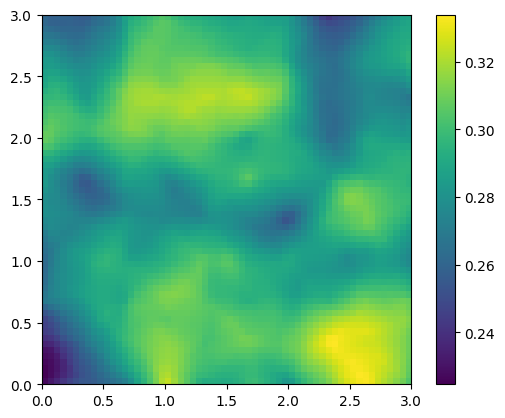

In [2]:
##EXAMPLE OF A NOISE. HERE, WE PROVIDE A CUSTOM WEIGHT FUNCTION AND COEFFS FUNCTION, BUT DO NOT PROVIDE A CUSTOM BASE HEIGHTS FUNCTION (THE DEFAULT (JUST RANDOM) ONE IS USED)

def weightFunction(coeffs: list[float], distance: float, angle: float, radius: float) -> float:
    lPrime = 2 - distance / radius - 1
    return coeffs[0] + coeffs[1] * lPrime + coeffs[2] * lPrime ** 2
    
def coefFunction(noiseLayer: NoiseLayer, gridPoint: list[int]) -> list[float]:
    ###IMPORTANT: IF RANDOMNESS IS USED, IT MUST BE SEEDED AND ITS SEED IDENTIFIABLE WITH THE GRID POINT, AS IT MUST BE REPRODUCEABLE

    random.seed(noiseLayer.seed + ";coeff;" + ",".join([str(coord) for coord in gridPoint]))
    coeffs = [random.random() - 1 for _ in range(2)]
    return [-(coeffs[0] + coeffs[1])] + coeffs


noise = AwesomeNoise(2,"aaa",2.2, None, weightFunction, [1.0, 2.0, 3.0], [3.0, 2.0, 1.0], None, None, coefFunction)

EXTENT, STEPS = 3.0, 60

vals = noise.getValues([np.linspace(0, EXTENT, STEPS), np.linspace(0, EXTENT, STEPS)])
plt.imshow(vals, extent=[0,EXTENT,0,EXTENT])
plt.colorbar()
plt.show()

In the scenarios class there are some pre configured weight, base height and coefs functions for "standard" situations. In this next example we create a checkerboard scenario that we then use to generate randomly distributed evenly-ish (but with a tweakable ishness) points:

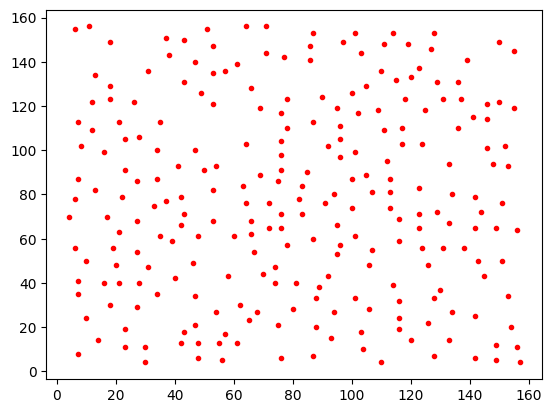

In [4]:
from awesomeNoise.scenarios import Scenario

noise = Scenario.Checkerboard(2, "seed")

EXTENT, STEPS = 3, 160

vals = noise.getValues([np.linspace(0, EXTENT, STEPS), np.linspace(0, EXTENT, STEPS)])
(points, heights) = noise.getLocalMaximumValues(AwesomeNoise.getDivergenceValues(vals), 3)

points = np.array(points)

plt.plot(points.T[0], points.T[1], "r.")
plt.show()